## imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier #from xgboost import Boosterfrom xgboost import DMatrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, fbeta_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, log_loss,ConfusionMatrixDisplay,plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold

C:\Users\varsh\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#! pip install imblearn

In [3]:
data = pd.read_csv("diabetes_assignment.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Conclusion:
                No missing values
                

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check for the imbalance

In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:ylabel='Outcome'>

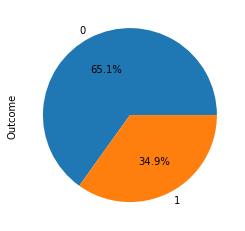

In [7]:
data['Outcome'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

##### Data is imbalance.

#### EDA

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

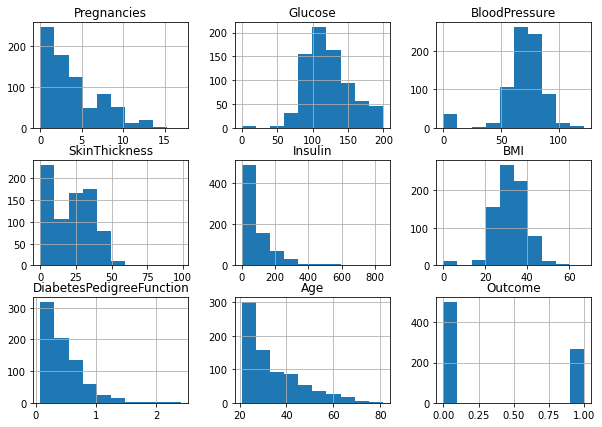

In [8]:
data.hist(figsize = (10,7))

#### Conclusion:
                Features Pregnancies,Insulin,Age,DiabetesPedigreeFunction,Glucose,BloodPressure are skewed and Other looks normally distributed.

### Univarate analysis

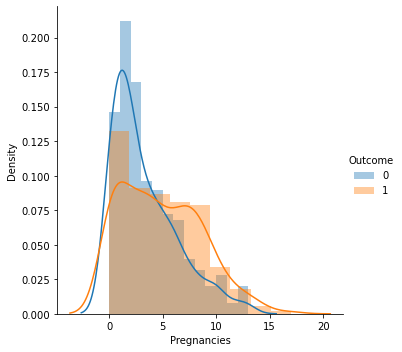

In [9]:
sns.FacetGrid(data, hue="Outcome", height=5).map(sns.distplot, "Pregnancies").add_legend()
plt.show() 

#### Conclusion:
                Data is more dense for diabetic. 
                Data is overlapped. 
                Peak at about 1 to 3 for non-diabetic people.
                Values greater than 5 we can say more people are diabetic because for non-diabetic data is getting less dense.

In [10]:
data.groupby(['Outcome'])[['Pregnancies']].agg(['mean'])

,Pregnancies
,mean
Outcome,
0,3.298000
1,4.865672


#### Conclusion:
                Count for pregnancies is high for diabetic people.

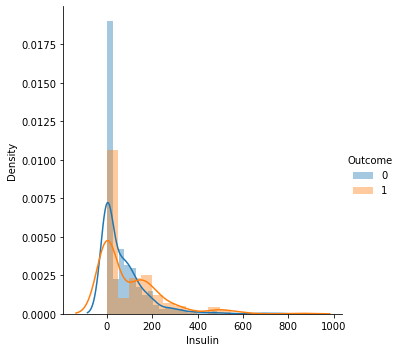

In [11]:
sns.FacetGrid(data, hue="Outcome", height=5).map(sns.distplot, "Insulin").add_legend()
plt.show() 

#### Conclusion:
                Data is overlapped, Its difficult to classify.
                Peak at 0 to 50 is for non-diabetic people.
                

In [12]:
data.groupby(['Outcome'])[['Insulin']].agg(['mean'])

,Insulin
,mean
Outcome,
0,68.792000
1,100.335821


### Conclusion:
                  Person who is diabetic has more insulin level.

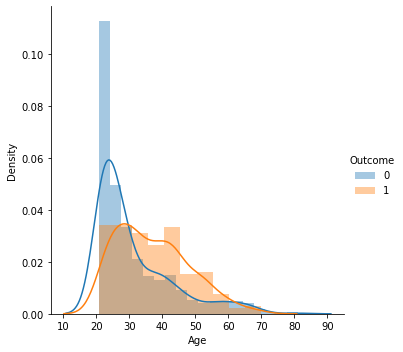

In [13]:
sns.FacetGrid(data, hue="Outcome", height=5).map(sns.distplot, "Age").add_legend()
plt.show() 

#### Conclusion: 
                Ranges between 30 to 60 have more diabetic people.
                14 to 25 is high chances for non-diabetic.
                

In [14]:
(data['Age'].min(),data['Age'].max())

(21, 81)

In [15]:
data.groupby(['Outcome'])[['Age']].agg(['mean'])

,Age
,mean
Outcome,
0,31.190000
1,37.067164


#### Conclusion:
                Mean for diabetic people for age feature is maximum than non-diabetic.

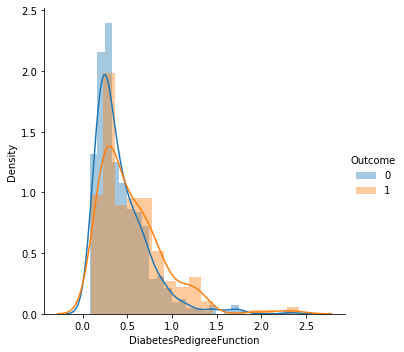

In [16]:
sns.FacetGrid(data, hue="Outcome", height=5).map(sns.distplot, "DiabetesPedigreeFunction").add_legend()
plt.show() 

#### Conclusion:
                Data is overlapped.
                Ranges from 1 to 1.5, We can say more people are diabetic.
                

In [17]:
data.groupby(['Outcome'])[['DiabetesPedigreeFunction']].agg(['mean'])

,DiabetesPedigreeFunction
,mean
Outcome,
0,0.429734
1,0.550500


#### Conclusion:
                Data is overlapped.

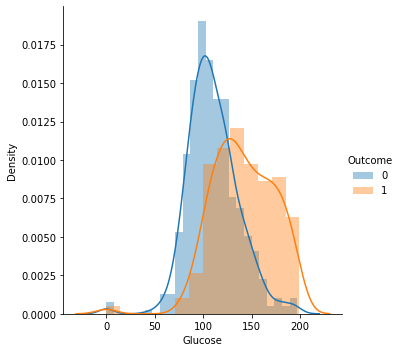

In [18]:
sns.FacetGrid(data, hue="Outcome", height=5).map(sns.distplot, "Glucose").add_legend()
plt.show() 

#### Conclusion:
                Glucose level from 130 to 230, More people are diabetic.
                Below 100 glucose level, we can say more people are non-diabetic.

In [19]:
data.groupby(['Outcome'])[['Glucose']].agg(['mean'])

,Glucose
,mean
Outcome,
0,109.980000
1,141.257463


#### Conclusion:
                Diabetic people has more glucose level.

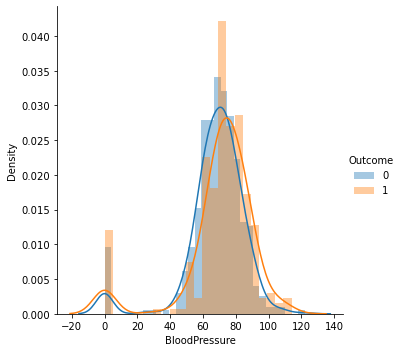

In [20]:
sns.FacetGrid(data, hue="Outcome", height=5).map(sns.distplot, "BloodPressure").add_legend()
plt.show() 

#### Conclusion:
                Data is fully overlapped.
                

In [21]:
data.groupby(['Outcome'])[['BloodPressure']].agg(['mean'])

,BloodPressure
,mean
Outcome,
0,68.184000
1,70.824627


#### Conclusion:
                Diabetic people has high bloodpressure problem then non-diabetic.

### Multivariate analysis

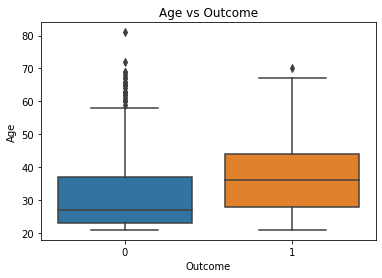

In [22]:
sns.boxplot(x = 'Outcome', y = 'Age', data = data)
plt.title('Age vs Outcome')
plt.show()

#### Conclusion:
                Median age for non-diabetic is about 25 and for diabetic is about 37.
                50 percentile data spread for non-diabetic is between 23 and 37 and for diabetic is between approx 27 to 42.
                

In [23]:
data.groupby(['Outcome'])['Age'].agg('mean')

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

#### Conclusion:
                Median for diabetic people are higher than non-diabetic. We can say that Age can also be possible factor in getting diabetic.

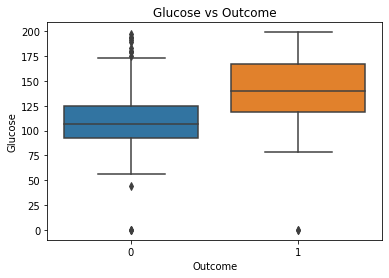

In [24]:
sns.boxplot(x = 'Outcome', y = 'Glucose', data = data)
plt.title('Glucose vs Outcome')
plt.show()

#### Conclusion:
                Most of the data lies between 80 to 125 for non-diabetic and 125 to 160 for dibetic.
                

In [25]:
data.groupby(['Outcome'])['Glucose'].agg('median')

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

#### Conclusion:
                Median for glucose for diabetic is higher so we can say that If glucose level is high than there more chances one is diabetic.

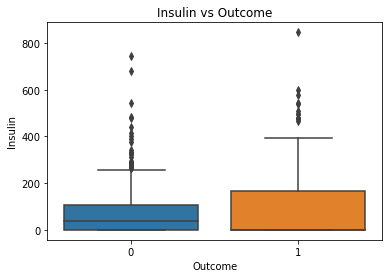

In [26]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = data)
plt.title('Insulin vs Outcome')
plt.show()

#### Conclusion:
                above 780, we can say people are dibetic.
                Most of the data spread lies between 0 to 100 for non-dibetic and 0 to 150 for dibetic.
                

In [27]:
data.groupby(['Outcome'])['Insulin'].agg('median')

Outcome
0    39.0
1     0.0
Name: Insulin, dtype: float64

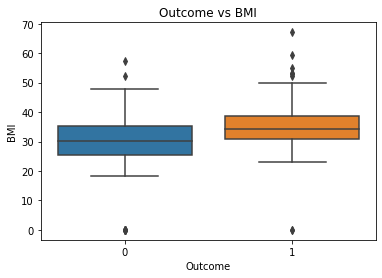

In [28]:
sns.boxplot(x = 'Outcome', y = 'BMI', data = data)
plt.title('Outcome vs BMI')
plt.show()

#### Conclusion:
                Above 60, we can easily say people are dibetic.
                Data spread is lies between about 26 to 36 for non-diabetic and for dibetic 30 to 37.

In [29]:
data.groupby(['Outcome'])['BMI'].agg('median')

Outcome
0    30.05
1    34.25
Name: BMI, dtype: float64

#### Conclusion:
                Median for diabetic people for BMI is greater than non-diabetic people.

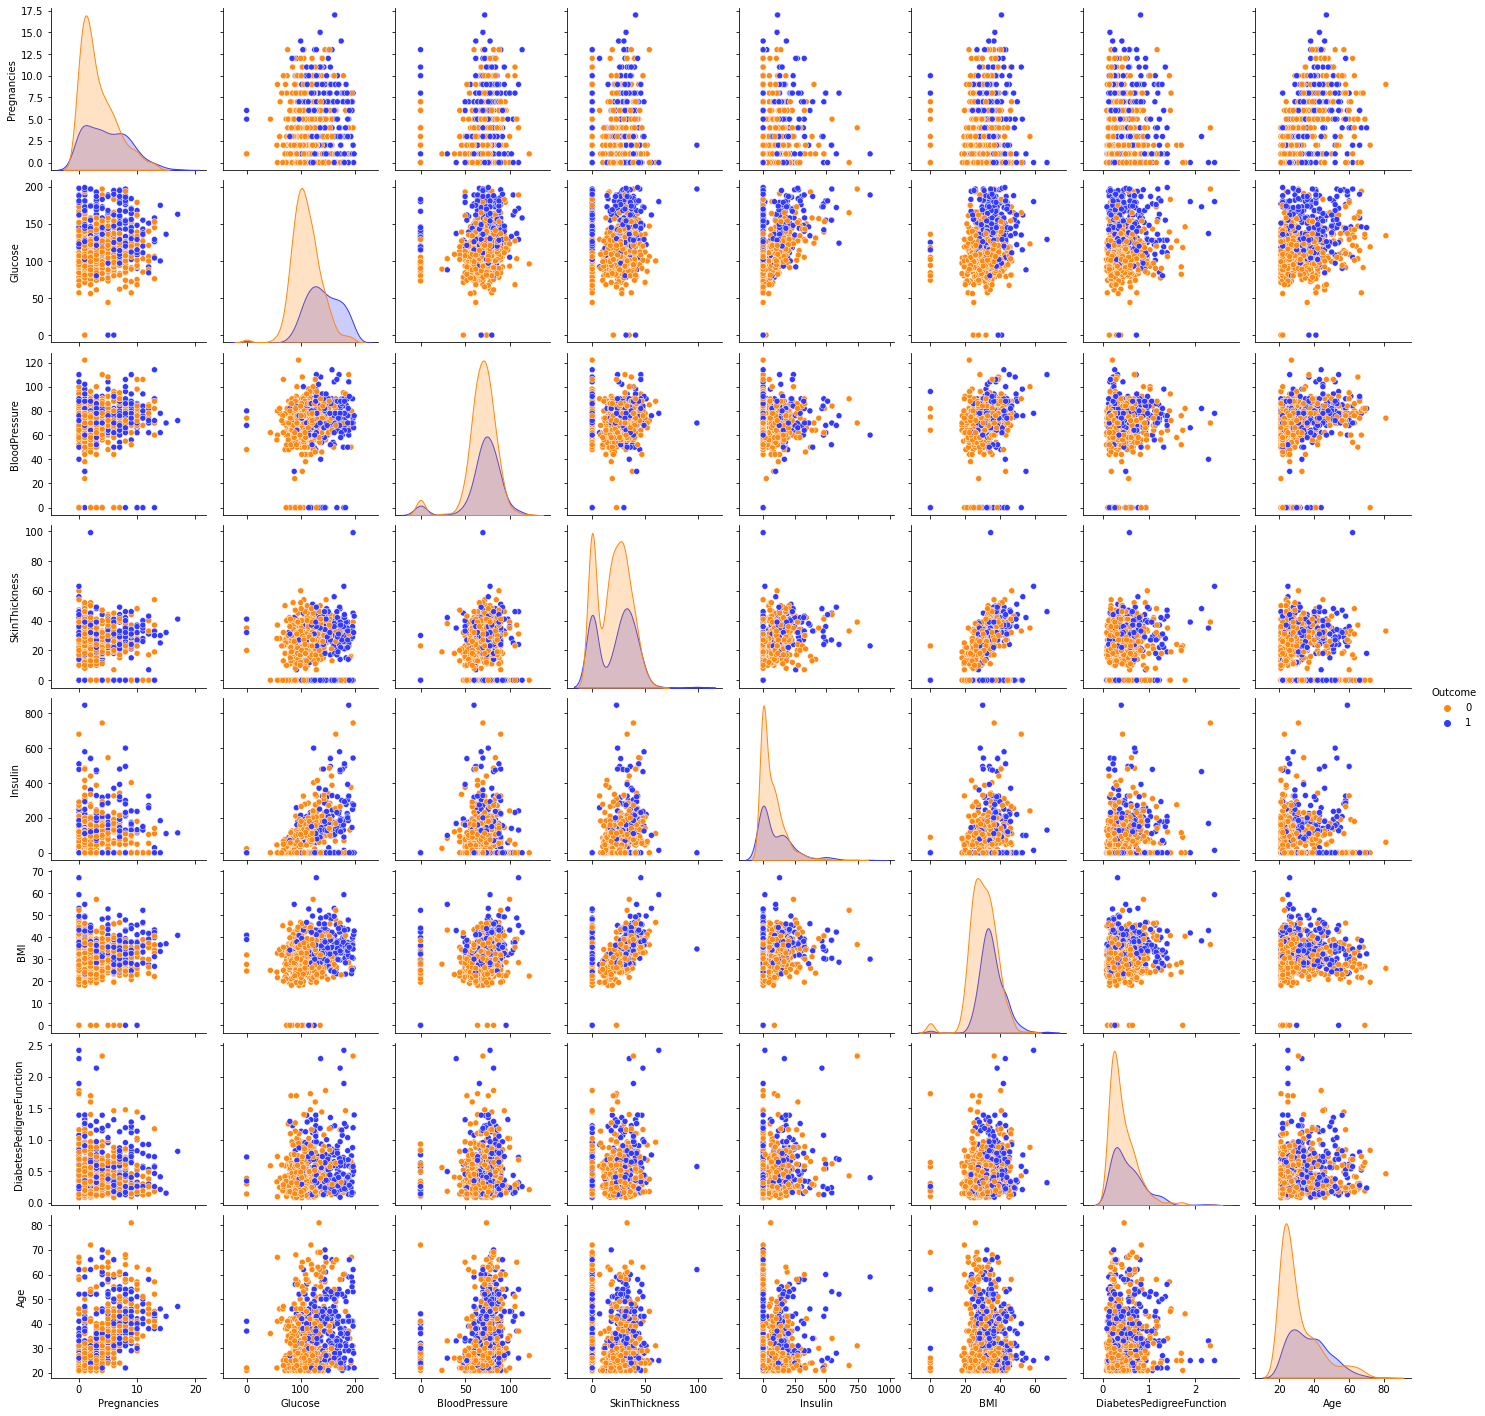

In [30]:
sns.pairplot(data = data,hue='Outcome',palette = ["#ff8811","#3339FF"])
plt.show()

#### Conclusion:
                We can see there is linear relationship between Age vs Pregnancies and Glucose vs Insulin.

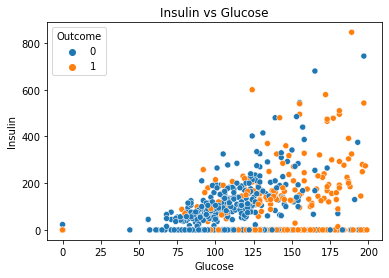

In [31]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = data,hue='Outcome')
plt.title('Insulin vs Glucose')
plt.show()

#### Conclusion:
                Data is overlapped.
                As Insulin increases glucose also increasing.
                

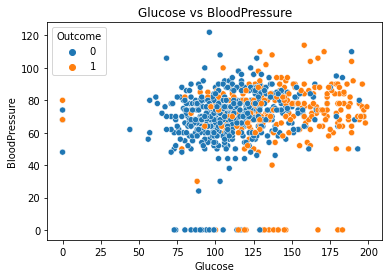

In [32]:
sns.scatterplot(x = 'Glucose', y = 'BloodPressure', data = data,hue='Outcome')
plt.title('Glucose vs BloodPressure')
plt.show()

#### Conclusion:
                Below 90 there are low chance people are diabetic. Above 150 there are high chance people are diabetic.

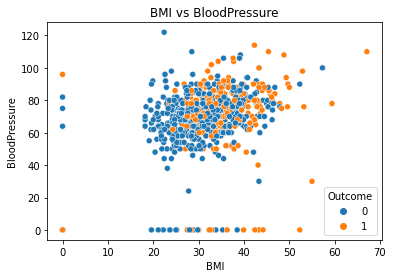

In [33]:
sns.scatterplot(x = 'BMI', y = 'BloodPressure', data = data,hue='Outcome')
plt.title('BMI vs BloodPressure')
plt.show()

#### Conclusion:
                Below BMI 25, We can say there are high chances people are non-diabetic.

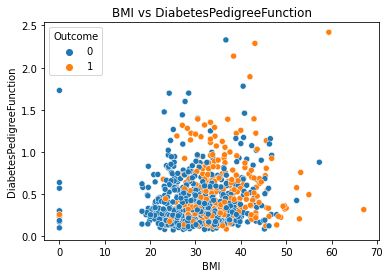

In [34]:
sns.scatterplot(x = 'BMI', y = 'DiabetesPedigreeFunction', data = data,hue='Outcome')
plt.title('BMI vs DiabetesPedigreeFunction')
plt.show()

#### Conclusion:
                Below 23, We can say there are high chances people are non-diabetic.

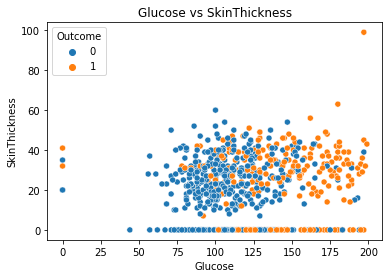

In [35]:
sns.scatterplot(x = 'Glucose', y = 'SkinThickness', data = data,hue='Outcome')
plt.title('Glucose vs SkinThickness')
plt.show()

#### Conclusion:
                Below 75 glucose level, we can say more people are non-diabetic.

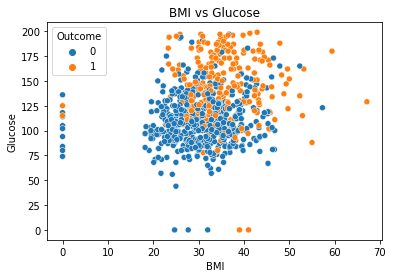

In [36]:
sns.scatterplot(x = 'BMI', y = 'Glucose', data = data,hue='Outcome')
plt.title('BMI vs Glucose')
plt.show()

#### Conclusion:
                Below 25 BMI, we can say more people are non diabetic.


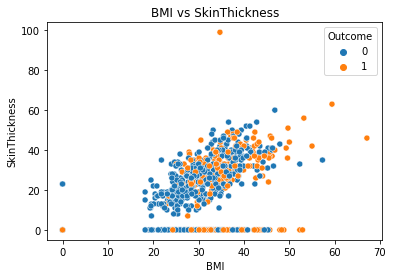

In [37]:
sns.scatterplot(x = 'BMI', y = 'SkinThickness', data = data,hue='Outcome')
plt.title('BMI vs SkinThickness')
plt.show()

#### Conclusion:
                Below 23 BMI we can say more people are non diabetic.

### Conclusion:
            Looks like BMI with other feature is helping classify the non-diabetic data.
            Mostly data is overlapped.
            With Glucose and Age we can seperate the class easily compare to others.
            Next will check with correaltion/heatmap How features are correlated.

<AxesSubplot:>

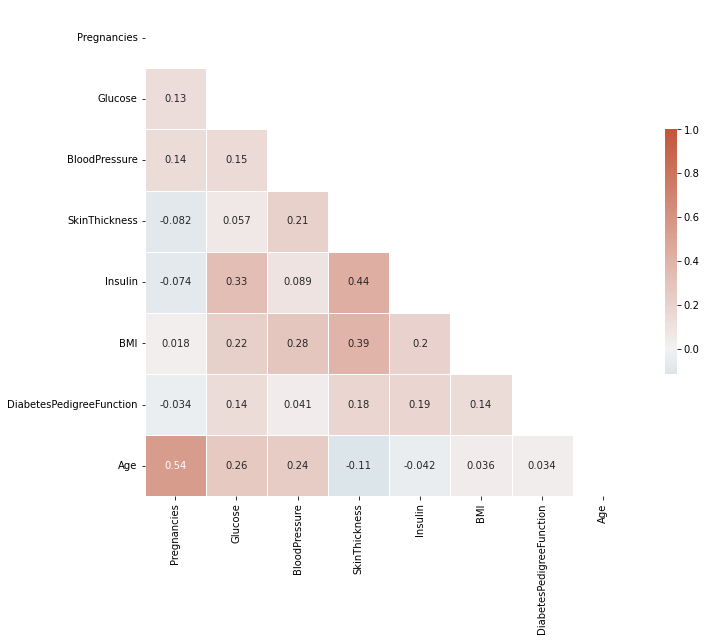

In [38]:
corr = data.drop(columns=['Outcome']).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

#### Conclusion:
                In above correlation We can say that features are weakly correlated. We are taking all the features for model building.

## Train-Test split

In [39]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .15,stratify=y)

In [40]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [41]:
(X_train.shape,y_train.shape)

((652, 8), (652,))

In [42]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,10,162,84,0,0,27.7,0.182,54
671,1,99,58,10,0,25.4,0.551,21
263,3,142,80,15,0,32.4,0.200,63
94,2,142,82,18,64,24.7,0.761,21
736,0,126,86,27,120,27.4,0.515,21
...,...,...,...,...,...,...,...,...
714,3,102,74,0,0,29.5,0.121,32
15,7,100,0,0,0,30.0,0.484,32
185,7,194,68,28,0,35.9,0.745,41
711,5,126,78,27,22,29.6,0.439,40


In [43]:
(X_test.shape,y_test.shape)

((116, 8), (116,))

In [44]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [45]:
(X_train_scaled.shape,X_test_scaled.shape)

((652, 8), (116, 8))

In [46]:
y_train.shape

(652,)

### Base Model

#### Logistic regrssion

In [47]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled,y_train)

LogisticRegression()

In [48]:
y_pred_lr = lr_clf.predict(X_test_scaled)

In [49]:
lr_score = recall_score(y_pred_lr,y_test) # Type 2 error = TP / (TP + FN)
lr_score

0.7272727272727273

In [50]:
lr_f1score = f1_score(y_pred_lr,y_test) 
lr_f1score

0.6575342465753425

#### Random forest

In [51]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled,y_train)    

RandomForestClassifier()

In [52]:
y_pred_rf = rf_clf.predict(X_test_scaled)

In [53]:
rf_score = recall_score(y_pred_rf,y_test)

In [54]:
rf_score

0.7575757575757576

In [55]:
rf_clf.feature_importances_

array([0.08248068, 0.24109774, 0.09704976, 0.0726865 , 0.07264739,
       0.16075517, 0.13596591, 0.13731685])

In [56]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

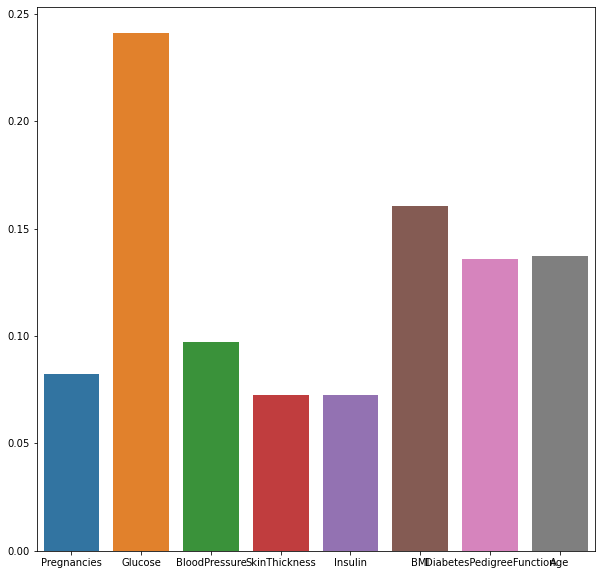

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_train.columns,y=rf_clf.feature_importances_)
plt.show()

#### SVC

In [58]:
svc_clf = SVC()
svc_clf.fit(X_train_scaled,y_train)

SVC()

In [59]:
y_pred_svc = svc_clf.predict(X_test_scaled)

In [60]:
svc_score = recall_score(y_pred_svc,y_test)

In [61]:
svc_score

0.6896551724137931

#### XGBOOSt

In [62]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_scaled,y_train)

[16:41:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [64]:
xgb_score = recall_score(y_pred_xgb,y_test)

In [65]:
xgb_score

0.7058823529411765

In [66]:
score_report = {'lr':lr_score,'rf':rf_score,'svc':svc_score,'xgb':xgb_score}
performance_metrics = pd.DataFrame(score_report,index=['recall_score'])

In [67]:
performance_metrics

,lr,rf,svc,xgb
recall_score,0.727273,0.757576,0.689655,0.705882


#### Important features:

In [68]:
rf_clf.feature_importances_

array([0.08248068, 0.24109774, 0.09704976, 0.0726865 , 0.07264739,
       0.16075517, 0.13596591, 0.13731685])

In [69]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

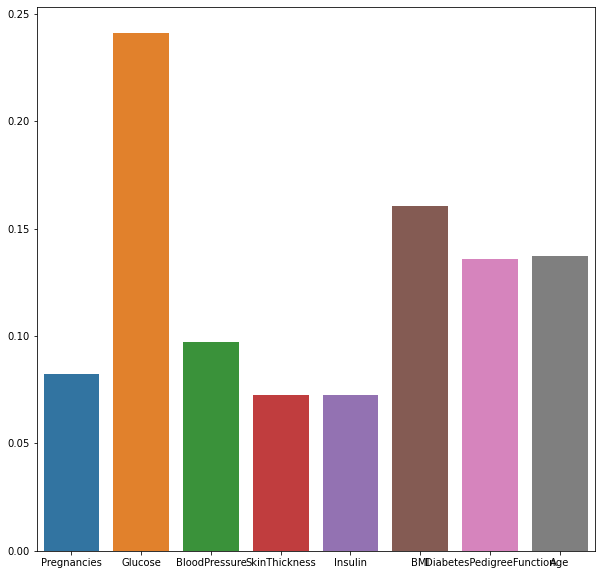

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_train.columns,y=rf_clf.feature_importances_)
plt.show()

In [71]:
X_train_impfeat = X_train[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_test_impfeat = X_test[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [72]:
std_scale = StandardScaler()
X_train_scaled_impfeat = std_scale.fit_transform(X_train_impfeat)
X_test_scaled_impfeat = std_scale.transform(X_test_impfeat)

In [73]:
lr_clf_impfeat = LogisticRegression()
lr_clf_impfeat.fit(X_train_scaled_impfeat,y_train)

LogisticRegression()

In [74]:
y_pred_lr_impfeat = lr_clf_impfeat.predict(X_test_scaled_impfeat)

In [75]:
lr_score_impfeat = recall_score(y_pred_lr_impfeat,y_test) # Type 2 error = TP / (TP + FN)
lr_score_impfeat

0.7272727272727273

In [76]:
lr_f1score_impfeat = f1_score(y_pred_lr_impfeat,y_test) 
lr_f1score_impfeat

0.6575342465753425

In [77]:
print(classification_report(y_test,y_pred_lr_impfeat))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        76
           1       0.73      0.60      0.66        40

    accuracy                           0.78       116
   macro avg       0.77      0.74      0.75       116
weighted avg       0.78      0.78      0.78       116



#### Hyperparameter tune Using class weight

In [78]:
lr_clswts = LogisticRegression()

In [79]:
weights = np.linspace(0,1,200)

In [80]:
# weights = []
# for i,j in zip(x,1-x):
#     d1 = {}
#     d1[0] = i
#     d1[1] = j
    
#     weights.append(d1)

# [{0:x, 1:1-x} for x in weights]

In [81]:
param_grid = [ {'class_weight': [{0:x, 1:1-x} for x in weights]},
               {'penalty' : ['l1','l2']},
               {'C' : [100, 10, 1.0, 0.1, 0.01]},
               {'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
             ]

In [82]:
gridsearch = GridSearchCV(estimator= lr_clswts,
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [83]:
gridsearch.best_score_

0.6715749651672894

In [84]:
gridsearch.best_estimator_

LogisticRegression(class_weight={0: 0.35678391959798994, 1: 0.6432160804020101})

In [85]:
y_pred_lr_hypertune_wts = gridsearch.predict(X_test_scaled)

In [86]:
print(classification_report(y_test,y_pred_lr_hypertune_wts))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        76
           1       0.65      0.80      0.72        40

    accuracy                           0.78       116
   macro avg       0.77      0.79      0.77       116
weighted avg       0.80      0.78      0.79       116



In [87]:
lr_f1score_hypertune_clswts = f1_score(y_test,y_pred_lr_hypertune_wts)

In [88]:
lr_f1score_hypertune_clswts

0.7191011235955055

##### Hyperparameter tune using class weights and feature importance

In [89]:
X_train_weights_impfeat = X_train[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X_test_weights_impfeat = X_test[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [90]:
std_scale = StandardScaler()
X_train_scaled_weights_impfeat = std_scale.fit_transform(X_train_weights_impfeat)
X_test_scaled_weights_impfeat = std_scale.transform(X_test_weights_impfeat)

In [91]:
lr_clswts_impfeat = LogisticRegression()

In [92]:
gridsearch_impfeat = GridSearchCV(estimator= lr_clswts_impfeat,
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_scaled_weights_impfeat, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [93]:
gridsearch_impfeat.predict(X_test_scaled_weights_impfeat)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0], dtype=int64)

In [94]:
gridsearch_impfeat.best_score_

0.6798355101467594

In [95]:
y_pred_lr_hypertune_wts_impfeat = gridsearch_impfeat.predict(X_test_scaled_weights_impfeat)

In [96]:
print(classification_report(y_test,y_pred_lr_hypertune_wts_impfeat))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        76
           1       0.65      0.80      0.72        40

    accuracy                           0.78       116
   macro avg       0.77      0.79      0.77       116
weighted avg       0.80      0.78      0.79       116



In [97]:
lr_f1score_hyperpara_clswts_impfeat = f1_score(y_test,y_pred_lr_hypertune_wts_impfeat)

In [98]:
lr_f1score_hyperpara_clswts_impfeat

0.7191011235955055

##### copy train scaled data to train_temp_data

In [99]:
train_temp_data = pd.DataFrame(X_train_scaled)

In [100]:
train_temp_data['y_train'] = y_train.reset_index(drop = True)

In [101]:
train_temp_data.head()

,0,1,2,3,4,5,6,7,y_train
0,1.883691,1.261292,0.787706,-1.313810,-0.727962,-0.565449,-0.896019,1.769490,0
1,-0.865252,-0.678896,-0.600648,-0.679852,-0.727962,-0.862028,0.227902,-1.056545,0
2,-0.254376,0.645360,0.574113,-0.362873,-0.727962,0.040603,-0.841194,2.540227,0
3,-0.559814,0.645360,0.680910,-0.172685,-0.161735,-0.952291,0.867532,-1.056545,0
4,-1.170690,0.152613,0.894503,0.397877,0.333714,-0.604134,0.118251,-1.056545,0


### Using RandomUnderSampler from imblearn

In [102]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(train_temp_data.drop(columns = ['y_train']),train_temp_data['y_train'])

In [103]:
X_res

,0,1,2,3,4,5,6,7
0,-0.254376,-0.186150,-0.173462,1.158626,0.510660,0.775602,-0.993487,-0.457083
1,-0.559814,-0.401726,-0.921038,0.334481,-0.170582,0.053497,-0.481783,-0.970908
2,-0.254376,-0.771286,0.467317,1.158626,-0.727962,0.672444,-0.725451,0.570566
3,-0.865252,-1.294829,0.574113,0.271085,-0.400612,-0.862028,0.325370,-0.970908
4,-0.254376,-1.171642,-0.600648,0.651460,-0.568711,0.285602,-0.426957,-0.713996
...,...,...,...,...,...,...,...,...
451,0.051063,1.938819,0.467317,1.158626,1.722741,0.633760,-0.646259,-0.200171
452,-1.170690,1.784835,1.108096,0.397877,-0.727962,1.549285,0.639093,-0.885271
453,0.967377,-0.648099,-3.697747,-1.313810,-0.727962,-0.268871,0.023830,-0.114534
454,0.967377,2.246785,-0.066666,0.461273,-0.727962,0.491918,0.818799,0.656204


#### Using logistic regression with undersampling

In [104]:
lr_under_imb = LogisticRegression()
lr_under_imb.fit(X_res,y_res)

LogisticRegression()

In [105]:
y_pred_undersam_lr = lr_under_imb.predict(X_test_scaled)

In [106]:
lr_undersam_score = f1_score(y_pred_undersam_lr,y_test) # Type 2 error = TP / (TP + FN)
lr_undersam_score

0.7415730337078652

In [107]:
print(classification_report(y_test,y_pred_undersam_lr))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        76
           1       0.67      0.82      0.74        40

    accuracy                           0.80       116
   macro avg       0.78      0.81      0.79       116
weighted avg       0.82      0.80      0.81       116



### Oversampling SMOTE

In [108]:
sm_over = SMOTE(random_state=42)
X_res_over, y_res_over = sm_over.fit_resample(train_temp_data.drop(columns = ['y_train']),train_temp_data['y_train'])

In [109]:
X_res_over.shape

(848, 8)

In [110]:
y_res_over.shape

(848,)

#### Using LogisticRegrssion with SMOTE(oversampling)

In [111]:
lr_over_imb = LogisticRegression()
lr_over_imb.fit(X_res_over,y_res_over)

LogisticRegression()

In [112]:
y_pred_oversam_lr = lr_over_imb.predict(X_test_scaled)

In [113]:
lr_oversam_score = f1_score(y_pred_oversam_lr,y_test) # Type 2 error = TP / (TP + FN)
lr_oversam_score

0.7252747252747253

In [114]:
print(classification_report(y_test,y_pred_oversam_lr))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        76
           1       0.65      0.82      0.73        40

    accuracy                           0.78       116
   macro avg       0.77      0.79      0.77       116
weighted avg       0.81      0.78      0.79       116



In [115]:
score_report_f1score = {'lr':lr_f1score,'lr_impfeat':lr_f1score_impfeat,'lr_hypertune_clswts':lr_f1score_hypertune_clswts,
                'lr_hyperpara_clswts_impfeat':lr_f1score_hyperpara_clswts_impfeat,'lr_unersam_score':lr_undersam_score ,'lr_oversam_score':lr_oversam_score}
performance_metrics_f1score = pd.DataFrame(score_report_f1score,index=['f1_score'])

In [116]:
performance_metrics_f1score 

,lr,lr_impfeat,lr_hypertune_clswts,lr_hyperpara_clswts_impfeat,lr_unersam_score,lr_oversam_score
f1_score,0.657534,0.657534,0.719101,0.719101,0.741573,0.725275


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'lr'),
  Text(1, 0, 'lr_impfeat'),
  Text(2, 0, 'lr_hypertune_clswts'),
  Text(3, 0, 'lr_hyperpara_clswts_impfeat'),
  Text(4, 0, 'lr_unersam_score'),
  Text(5, 0, 'lr_oversam_score')])

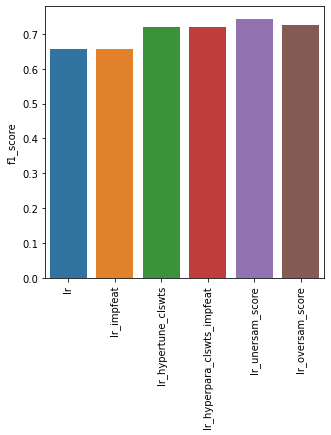

In [117]:
plt.figure(figsize=(5,5))
sns.barplot(x = performance_metrics_f1score.columns, y = performance_metrics_f1score.loc['f1_score'])
plt.xticks(rotation='vertical')

### Conclusion:
                With Logistic regression using undersampling technique getting 0.74 f1-score.